# 3. Метрики в задаче регрессии
Сгенерируйте датасет из 500 точек на плоскости, для которых $y = 0.5x + 1 + \varepsilon$, где $\varepsilon$ распределено нормально с матожиданием 0 и дисперсией 0.2.
1. Визуализируйте выборку.
2. Восстановите по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx+b$, и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализируйте восстановленную прямую.
3. Добавьте теперь в выборку 75 точек, для которых $y = -1 + \varepsilon$, а $x$ принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По новой расширенной выборке снова попробуйте восстановить зависимость $y(x) = kx + b$ двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные прямые.
4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизирующих MSE и MAE к выбросам.

In [1]:
from sklearn import metrics
import numpy as np
from scipy.optimize import minimize
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_x = 50
X = np.array([0,1])*max_x
N = 500
M = 75

In [3]:
x = sts.uniform(loc=X[0], scale=X[1]-X[0]).rvs(size=N)
eps = sts.norm(loc=0, scale=0.2**0.5).rvs(size=N)
y = x/2 + 1 + eps

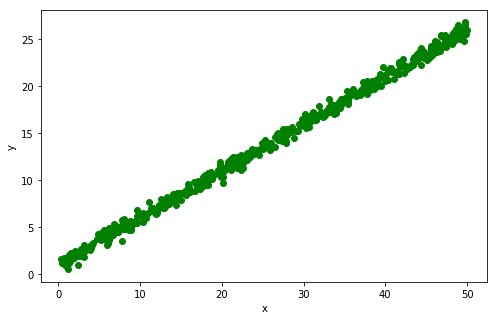

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
def maker(kb):
    k, b = kb
    return lambda(t):k*t + b
def MSE(kb):
    g = maker(kb)
    return ((g(x) - y)**2).mean(0)
def MAE(kb):
    g = maker(kb)
    return (np.abs(g(x) - y)).mean(0)

In [6]:
ans =  minimize(MSE, (0, 1), method='BFGS', options={'gtol':1e-4})
print ans
ans_MSE = ans.x
ans =  minimize(MAE, (0, 1), method='Nelder-Mead')
print ans
ans_MAE = ans.x

      fun: 0.19664314514325013
 hess_inv: array([[ 0.00220731, -0.05662604],
       [-0.05662604,  1.95267402]])
      jac: array([  1.86264515e-09,   1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49887387,  1.02466315])
 final_simplex: (array([[ 0.49782724,  1.05819084],
       [ 0.49783033,  1.05809763],
       [ 0.49782717,  1.05813133]]), array([ 0.35582012,  0.35582018,  0.35582022]))
           fun: 0.35582011660223445
       message: 'Optimization terminated successfully.'
          nfev: 143
           nit: 73
        status: 0
       success: True
             x: array([ 0.49782724,  1.05819084])


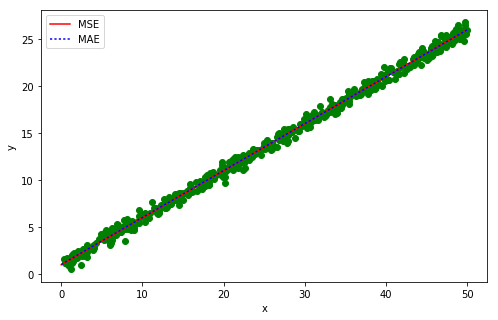

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, c='g')
plt.plot(X, maker(ans_MSE)(X), c='r', label = 'MSE', )
plt.plot(X, maker(ans_MAE)(X), ':', c='b', label = 'MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [8]:
x = np.concatenate([x, sts.uniform(loc=X[0], scale=X[1]-X[0]).rvs(size=M)])
y = np.concatenate([y, sts.norm(loc=0, scale=0.2**0.5).rvs(size=M) - 1])

In [9]:
ans =  minimize(MSE, (0, 1), method='BFGS', options={'gtol':1e-4})
print ans
ans_MSE = ans.x
ans =  minimize(MAE, (0, 1), method='Nelder-Mead')
print ans
ans_MAE = ans.x

      fun: 33.33290978024825
 hess_inv: array([[ 0.00224589, -0.05816675],
       [-0.05816675,  2.00647109]])
      jac: array([  9.53674316e-07,   9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.42743327,  0.82408444])
 final_simplex: (array([[ 0.49741068,  0.96354151],
       [ 0.4974119 ,  0.96349509],
       [ 0.49740938,  0.96361058]]), array([ 2.35400116,  2.35400116,  2.35400118]))
           fun: 2.3540011569261425
       message: 'Optimization terminated successfully.'
          nfev: 169
           nit: 90
        status: 0
       success: True
             x: array([ 0.49741068,  0.96354151])


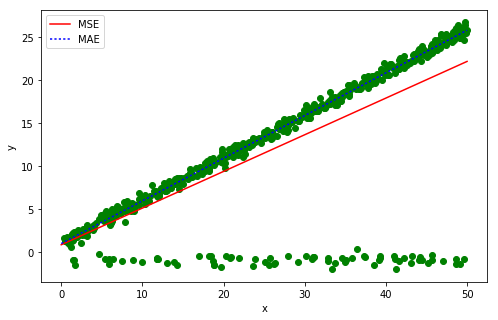

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, c='g')
plt.plot(X, maker(ans_MSE)(X), c='r', label = 'MSE', )
plt.plot(X, maker(ans_MAE)(X), ':', c='b', label = 'MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

Видно, что при добавлении выбросов, модель, оптимизирующая MAE, смещается к ним сильнее. Значит она менее устойчива к выбросам.